In [1]:
%cd ..
from src.utils import load_data, PathPlotter, BenchmarkPlotter, DistanceHistoryPlotter
from src.algos import *
import os

NUM_STARTS = 5

c:\Users\wojte\Desktop\essa-tsp-metaheuristics


In [2]:
distances = load_data(os.path.join("data", "Data_TSP_29.xlsx"))

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.5, reduce_func='reduce', n_iter=1000, verbose=False)
s.solve(distances)

distance: 2649
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap
n_iter: 1000
reduction function: reduce
alpha: 0.5
initial temperatute: 100
solving time: 0.288 s
history: 6049, 6062 ... 2649, 2649

In [4]:
# starting city for NN
n = NearestNeighbour()
n.solve(distances, start_order=14) 

distance: 2293
algorithm: NEAREST NEIGHBOUR

solving time: 0.012 s

In [5]:
# random seed for NN
n = NearestNeighbour()
result_nn = n.solve(distances, random_seed=42) 
result_nn

distance: 2374
algorithm: NEAREST NEIGHBOUR

solving time: 0.013 s

In [6]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30, neigh_type="swap")
result_tabu = t.solve(distances)
result_tabu

distance: 2466
algorithm: TABU SEARCH
Neighbourhood type: Swap
n_iter: 30
tabu_length: 3

solving time: 3.237 s
history: 5319, 4760 ... 2472, 2466

In [7]:
h = HillClimbing(verbose=False, n_iter=25, neigh_type="insertion")
result_hill = h.solve(distances)
result_hill

distance: 2145
algorithm: HILL CLIMBER
Neighbourhood type: Insertion
n_iter: 25

solving time: 5.428 s
history: 4460, 4201 ... 2149, 2145

In [8]:
# multistart - running algoruthm n_start times on max available threads
MultistartAlgorithm()(
    algorithm=HillClimbing,
    distances=distances,
    n_starts=NUM_STARTS,
    only_best=False, # returns pd.DataFrame
    verbose=False,
    n_iter=25,
    neigh_type="inversion"
)

,algorithm,path,distance,solving_time,size
0,HILL CLIMBER\nNeighbourhood type: Inversion\nn...,"[9, 19, 15, 13, 26, 21, 1, 16, 11, 17, 7, 8, 2...",4293,0.075373,29
1,HILL CLIMBER\nNeighbourhood type: Inversion\nn...,"[3, 28, 1, 25, 7, 15, 20, 18, 17, 14, 24, 5, 1...",4619,0.130051,29
2,HILL CLIMBER\nNeighbourhood type: Inversion\nn...,"[3, 22, 17, 25, 21, 9, 1, 23, 27, 4, 15, 2, 29...",4820,0.063449,29
3,HILL CLIMBER\nNeighbourhood type: Inversion\nn...,"[28, 7, 4, 29, 9, 8, 13, 19, 22, 18, 12, 27, 1...",5004,0.101983,29
4,HILL CLIMBER\nNeighbourhood type: Inversion\nn...,"[22, 13, 15, 27, 8, 16, 19, 24, 5, 26, 14, 18,...",5010,0.053667,29


In [9]:
results_sa = MultistartAlgorithm()(
    algorithm=SimulatedAnnealing,
    distances=distances,
    n_starts=NUM_STARTS,
    only_best=True,
    temp=1000,
    n_jobs=2, # number of threads - defulat all available
    alpha=.9,
    n_iter=100,
    verbose=False
)
results_sa

distance: 3598
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap
n_iter: 100
reduction function: reduce
alpha: 0.9
initial temperatute: 1000
solving time: 0.029 s
history: 5782, 5518 ... 3669, 3598

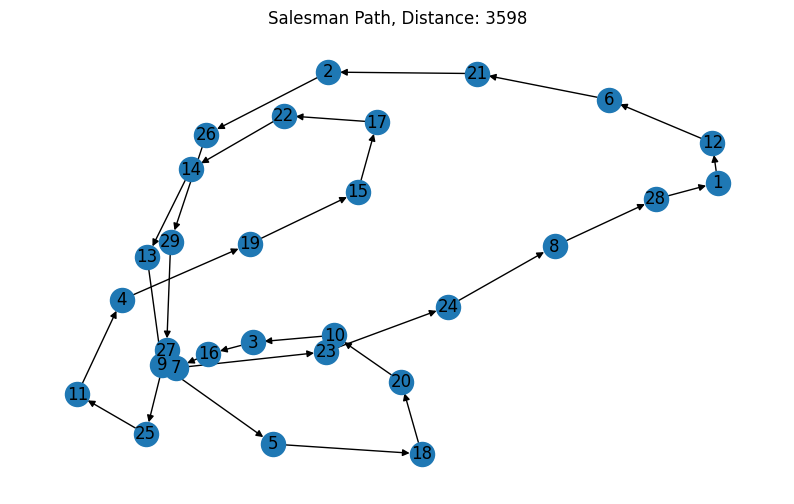

In [10]:
pp = PathPlotter()
pp.plot(results_sa)

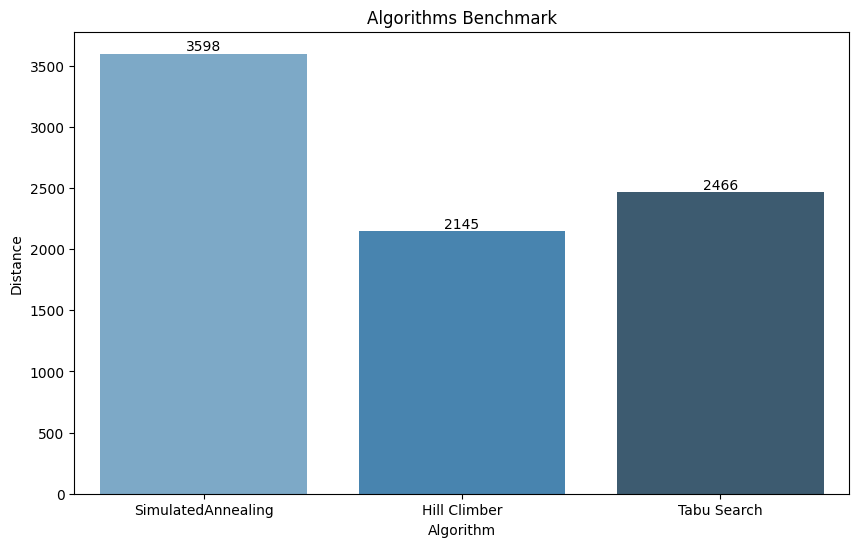

In [12]:
bp = BenchmarkPlotter()
bp.plot([results_sa, result_hill, result_tabu], labels=["SimulatedAnnealing", "Hill Climber", "Tabu Search"])

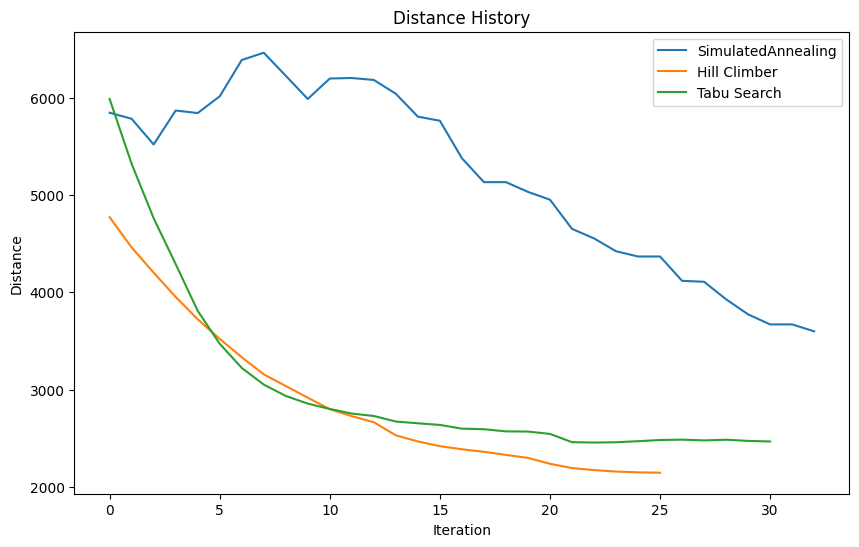

In [14]:
dhp = DistanceHistoryPlotter()
dhp.plot([results_sa, result_hill, result_tabu], labels=["SimulatedAnnealing", "Hill Climber", "Tabu Search"])